Pengubahan StandardScaler menjadi RobustScaler

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import talib

def generate_TAs_features(df):
    """
    Function to generate Technical Analysis features:
    - MA (Moving Average)
    - RSI (Relative Strength Index)
    - MFI (Money Flow Index)
    """
    res = df.copy()
    for i in [7, 14, 21]:
        # Moving Average
        res[f'{i} DAYS MA'] = talib.MA(res['Close'], timeperiod=i)
        res[f'{i} DAYS MA'] = res[f'{i} DAYS MA'].shift(1)
        
        # RSI (Relative Strength Index)
        res[f'RSI {i}'] = talib.RSI(res['Close'], timeperiod=i)
        
        # MFI (Money Flow Index)
        res[f'MFI {i}'] = talib.MFI(res['High'], res['Low'], res['Close'], res['Volume'], timeperiod=i)
        
        # Standard Deviation
        if i == 7:
            res[f'{i} DAYS STD DEV'] = res['Close'].rolling(i).std()
            res[f'{i} DAYS STD DEV'] = res[f'{i} DAYS STD DEV'].shift(1)
    
    print(res.isnull().sum())
    res = res[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',            
               '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV',
               'RSI 7', 'RSI 14', 'RSI 21',            
               'MFI 7', 'MFI 14', 'MFI 21']]
    res = res.dropna()
    return res

def generate_date_related_features(df):
    """
    Function to generate date related features
    """
    res = df.copy()
    res['dayofweek'] = df.index.dayofweek
    res['quarter'] = df.index.quarter
    res['month'] = df.index.month
    res['year'] = df.index.year
    res['dayofyear'] = df.index.dayofyear
    res['dayofmonth'] = df.index.day
    res['weekofyear'] = df.index.isocalendar().week
    return res

In [3]:
import yfinance as yf

In [4]:
df = yf.download('ISAT.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,6050.0,6200.0,5900.0,6050.0,5033.156738,3809500
2012-09-19,6050.0,6100.0,6000.0,6050.0,5033.156738,2498000
2012-09-20,5700.0,6000.0,5650.0,5700.0,4741.981445,6142500
2012-09-21,5350.0,5750.0,5250.0,5350.0,4450.807129,12418000
2012-09-24,5300.0,5500.0,5150.0,5300.0,4409.210938,5709500


In [5]:
df.index = pd.to_datetime(df.index)

## Feature Extraction

In [6]:
df2 = generate_TAs_features(df)
df2.head()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
RSI 7              7
MFI 7              7
7 DAYS STD DEV     7
14 DAYS MA        14
RSI 14            14
MFI 14            14
21 DAYS MA        21
RSI 21            21
MFI 21            21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21
Date,,,,,,,,,,,,,,,,
2012-10-17,6100.0,6100.0,5900.0,6100.0,5074.752930,2743500,5921.428571,5664.285714,5642.857143,138.013112,68.097080,53.242462,51.063830,62.454151,76.318947,54.506280
2012-10-18,6050.0,6200.0,6000.0,6050.0,5033.156738,1800000,5985.714286,5714.285714,5645.238095,85.216810,63.162804,51.450759,49.947971,59.242012,72.942854,55.663988
2012-10-19,6050.0,6150.0,6000.0,6050.0,5033.156738,2150000,6000.000000,5760.714286,5645.238095,86.602540,63.162804,51.450759,49.947971,37.363629,74.187897,58.732466
2012-10-22,6200.0,6200.0,6000.0,6200.0,5157.945312,2443500,5992.857143,5817.857143,5661.904762,78.679579,71.573518,56.539322,53.321704,52.690473,73.281637,71.667041
2012-10-23,6150.0,6300.0,6100.0,6150.0,5116.349121,1864000,6021.428571,5875.000000,5702.380952,111.269728,65.736656,54.489169,52.092754,62.492931,72.920363,79.107109


In [7]:
df3 = generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,...,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-17,6100.0,6100.0,5900.0,6100.0,5074.752930,2743500,5921.428571,5664.285714,5642.857143,138.013112,...,62.454151,76.318947,54.506280,2,4,10,2012,291,17,42
2012-10-18,6050.0,6200.0,6000.0,6050.0,5033.156738,1800000,5985.714286,5714.285714,5645.238095,85.216810,...,59.242012,72.942854,55.663988,3,4,10,2012,292,18,42
2012-10-19,6050.0,6150.0,6000.0,6050.0,5033.156738,2150000,6000.000000,5760.714286,5645.238095,86.602540,...,37.363629,74.187897,58.732466,4,4,10,2012,293,19,42
2012-10-22,6200.0,6200.0,6000.0,6200.0,5157.945312,2443500,5992.857143,5817.857143,5661.904762,78.679579,...,52.690473,73.281637,71.667041,0,4,10,2012,296,22,43
2012-10-23,6150.0,6300.0,6100.0,6150.0,5116.349121,1864000,6021.428571,5875.000000,5702.380952,111.269728,...,62.492931,72.920363,79.107109,1,4,10,2012,297,23,43


In [8]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2012-10-17,6100.0,5921.428571,5664.285714,5642.857143,138.013112,68.097080,53.242462,51.063830,62.454151,76.318947,54.506280,2,4,10,2012,291,17,42
2012-10-18,6050.0,5985.714286,5714.285714,5645.238095,85.216810,63.162804,51.450759,49.947971,59.242012,72.942854,55.663988,3,4,10,2012,292,18,42
2012-10-19,6050.0,6000.000000,5760.714286,5645.238095,86.602540,63.162804,51.450759,49.947971,37.363629,74.187897,58.732466,4,4,10,2012,293,19,42
2012-10-22,6200.0,5992.857143,5817.857143,5661.904762,78.679579,71.573518,56.539322,53.321704,52.690473,73.281637,71.667041,0,4,10,2012,296,22,43
2012-10-23,6150.0,6021.428571,5875.000000,5702.380952,111.269728,65.736656,54.489169,52.092754,62.492931,72.920363,79.107109,1,4,10,2012,297,23,43


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2012-10-17 to 2022-09-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2459 non-null   float64
 1   7 DAYS MA       2459 non-null   float64
 2   14 DAYS MA      2459 non-null   float64
 3   21 DAYS MA      2459 non-null   float64
 4   7 DAYS STD DEV  2459 non-null   float64
 5   RSI 7           2459 non-null   float64
 6   RSI 14          2459 non-null   float64
 7   RSI 21          2459 non-null   float64
 8   MFI 7           2459 non-null   float64
 9   MFI 14          2459 non-null   float64
 10  MFI 21          2459 non-null   float64
 11  dayofweek       2459 non-null   int64  
 12  quarter         2459 non-null   int64  
 13  month           2459 non-null   int64  
 14  year            2459 non-null   int64  
 15  dayofyear       2459 non-null   int64  
 16  dayofmonth      2459 non-null   int64  
 17  weekofyear     

In [10]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,5921.428571,5664.285714,5642.857143,138.013112,68.097080,53.242462,51.063830,62.454151,76.318947,54.506280,2,4,10,2012,291,17,42,6100.0
2012-10-18,5985.714286,5714.285714,5645.238095,85.216810,63.162804,51.450759,49.947971,59.242012,72.942854,55.663988,3,4,10,2012,292,18,42,6050.0
2012-10-19,6000.000000,5760.714286,5645.238095,86.602540,63.162804,51.450759,49.947971,37.363629,74.187897,58.732466,4,4,10,2012,293,19,42,6050.0
2012-10-22,5992.857143,5817.857143,5661.904762,78.679579,71.573518,56.539322,53.321704,52.690473,73.281637,71.667041,0,4,10,2012,296,22,43,6200.0
2012-10-23,6021.428571,5875.000000,5702.380952,111.269728,65.736656,54.489169,52.092754,62.492931,72.920363,79.107109,1,4,10,2012,297,23,43,6150.0


## Data Standardization

### Standard Scaler

In [11]:
# standard_df = df4.copy()

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# features_scaler = StandardScaler()
# features = standard_df.columns[:-1]
# standard_df[features] = features_scaler.fit_transform(standard_df[features])

In [14]:
# close_scaler = StandardScaler()
# standard_df['Close'] = close_scaler.fit_transform(np.array(standard_df['Close']).reshape(-1,1))

In [15]:
# standard_df.head()

### Robust Scaler

In [16]:
robust_df = df4.copy()

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
features_scaler = RobustScaler()
features = robust_df.columns[:-1]
robust_df[features] = features_scaler.fit_transform(robust_df[features])

In [19]:
close_scaler = RobustScaler()
robust_df['Close'] = close_scaler.fit_transform(np.array(robust_df['Close']).reshape(-1,1))

In [20]:
robust_df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.437800,0.340388,0.341359,0.526150,0.750237,0.216300,0.113942,0.235652,0.709952,0.010976,0.0,0.5,0.5,-1.0,0.594005,0.066667,0.592593,0.482270
2012-10-18,0.460510,0.358130,0.342201,-0.036486,0.560174,0.121030,0.039230,0.163048,0.609002,0.051422,0.5,0.5,0.5,-1.0,0.599455,0.133333,0.592593,0.464539
2012-10-19,0.465556,0.374604,0.342201,-0.021718,0.560174,0.121030,0.039230,-0.331469,0.646230,0.158623,1.0,0.5,0.5,-1.0,0.604905,0.200000,0.592593,0.464539
2012-10-22,0.463033,0.394880,0.348093,-0.106151,0.884145,0.391605,0.265115,0.014964,0.619132,0.610507,-1.0,0.5,0.5,-1.0,0.621253,0.400000,0.629630,0.517730
2012-10-23,0.473126,0.415157,0.362404,0.241153,0.659316,0.282592,0.182832,0.236528,0.608329,0.870434,-0.5,0.5,0.5,-1.0,0.626703,0.466667,0.629630,0.500000


## Save Files

### Save scalers

In [21]:
from joblib import dump, load

In [22]:
dump(features_scaler, 'isat_features_scaler.bin', compress=True)

['isat_features_scaler.bin']

In [23]:
dump(close_scaler, 'isat_close_scaler.bin', compress=True)

['isat_close_scaler.bin']

In [24]:
test_loaded_sc = load('isat_close_scaler.bin')
test_loaded_sc.inverse_transform(np.array(robust_df['Close']).reshape(-1,1))[0]

array([6100.])

### Save .csv file

In [25]:
robust_df.to_csv('../cleaned_data/ISAT.csv')

## EDA

In [26]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


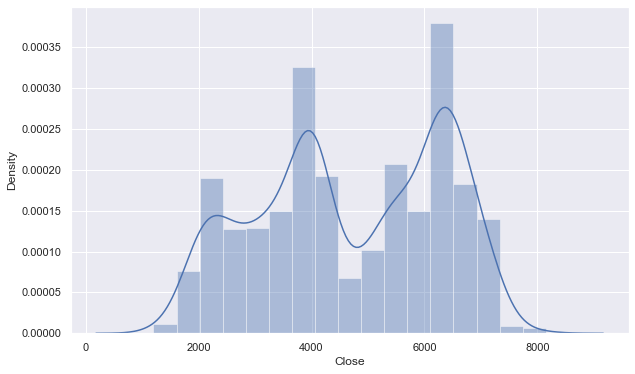

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df4['Close'])
plt.show()

In [28]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

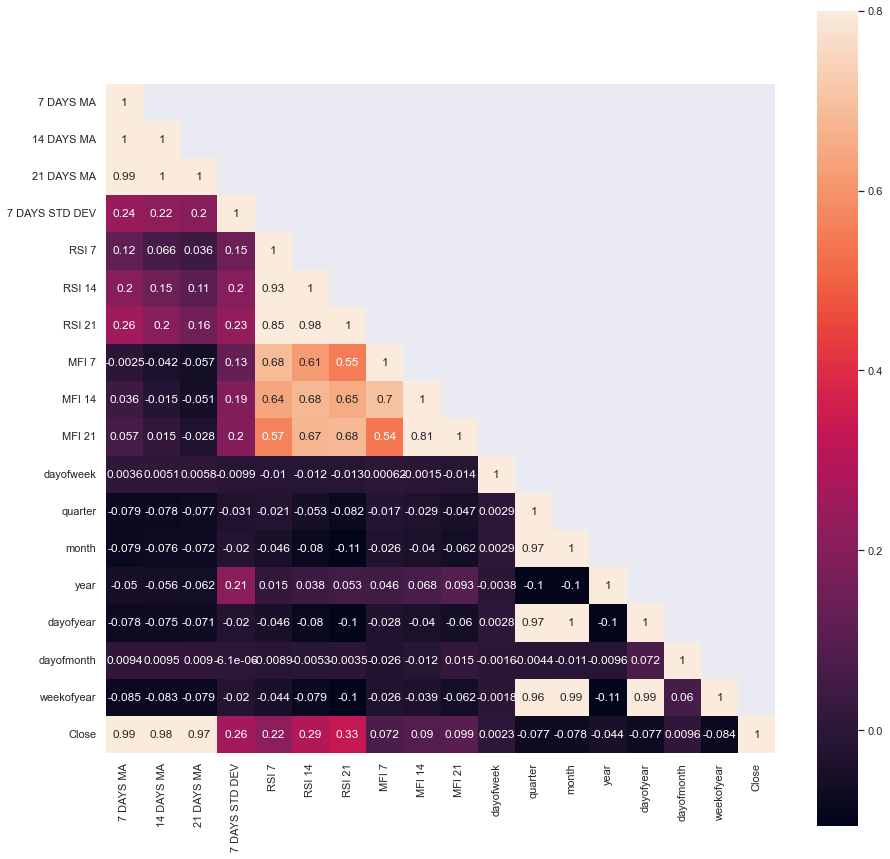

In [29]:
corr_data = robust_df.corr()
plot_corr_coef(corr_data)

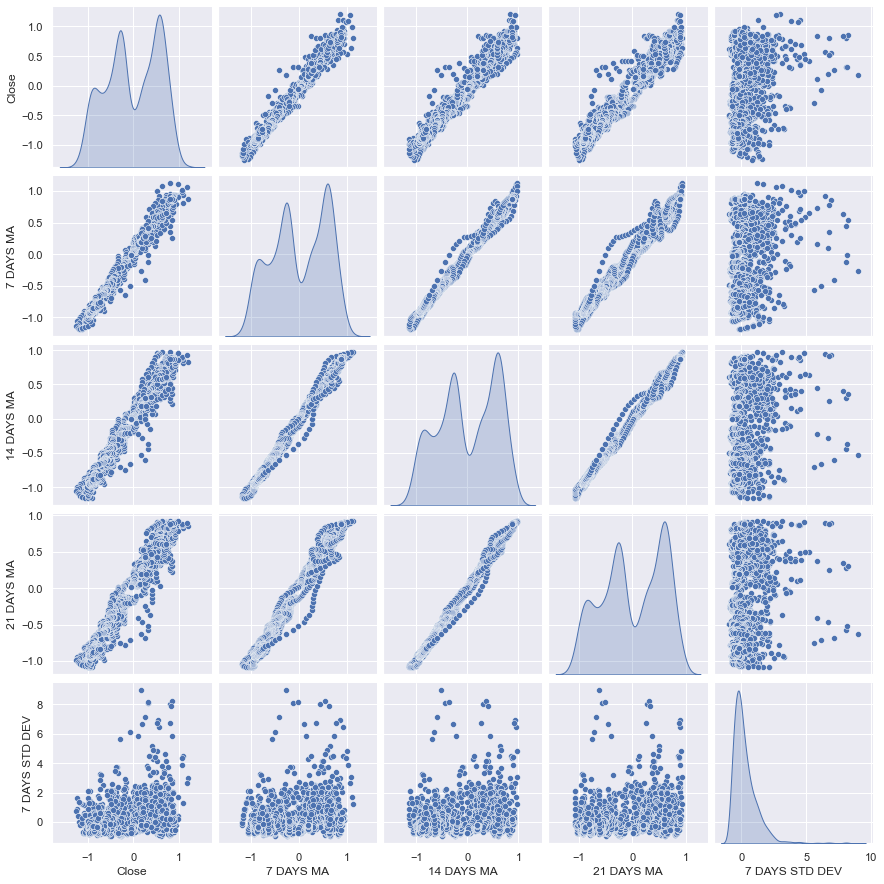

In [31]:
sns.pairplot(robust_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']], diag_kind='kde')
plt.show()

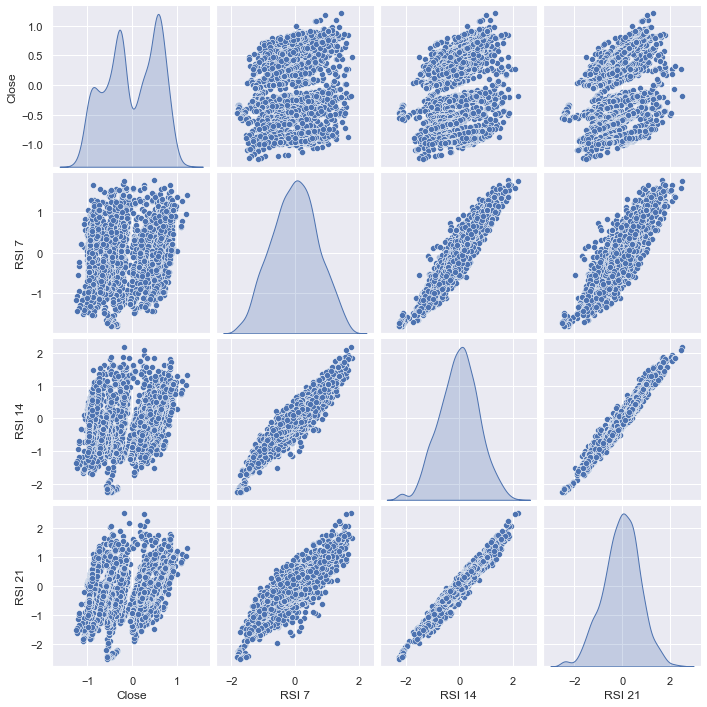

In [32]:
sns.pairplot(robust_df[['Close', 'RSI 7', 'RSI 14', 'RSI 21']], diag_kind='kde')
plt.show()